In [1]:
import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

# suppress all warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
accidents = pd.read_csv('Accident_Information.csv')
print('Records:', accidents.shape[0], '\nColumns:', accidents.shape[1])
accidents.head()

Records: 2047256 
Columns: 34


,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,None,2005-01-04,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,None,2005-01-05,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,None,2005-01-06,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,None,2005-01-07,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,None,2005-01-10,Monday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,21:13,Urban,Fine no high winds,2005,No


In [3]:
accidents['Date']= pd.to_datetime(accidents['Date'], format="%Y-%m-%d")

In [4]:
accidents.iloc[:, 8:11].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047256 entries, 0 to 2047255
Data columns (total 3 columns):
Day_of_Week                                    object
Did_Police_Officer_Attend_Scene_of_Accident    float64
Junction_Control                               object
dtypes: float64(1), object(2)
memory usage: 46.9+ MB


In [5]:
daytime_groups = {1: 'Morning (5-10)', 
                  2: 'Office Hours (10-15)', 
                  3: 'Afternoon Rush (15-19)', 
                  4: 'Evening (19-23)', 
                  5: 'Night(23-5)'}

In [6]:
# slice first and second string from time column
accidents['Hour'] = accidents['Time'].str[0:2]

# convert new column to numeric datetype
accidents['Hour'] = pd.to_numeric(accidents['Hour'])

# drop null values in our new column
accidents = accidents.dropna(subset=['Hour'])

# cast to integer values
accidents['Hour'] = accidents['Hour'].astype('int')

In [7]:
def when_was_it(hour):
    if hour >= 5 and hour < 10:
        return "1"
    elif hour >= 10 and hour < 15:
        return "2"
    elif hour >= 15 and hour < 19:
        return "3"
    elif hour >= 19 and hour < 23:
        return "4"
    else:
        return "5"

In [8]:
accidents['Daytime'] = accidents['Hour'].apply(when_was_it)
accidents[['Time', 'Hour', 'Daytime']].tail()

,Time,Hour,Daytime
2047251,11:30,11,2
2047252,13:00,13,2
2047253,13:30,13,2
2047254,18:00,18,3
2047255,13:00,13,2


In [9]:
accidents = accidents.drop(columns=['Time', 'Hour'])

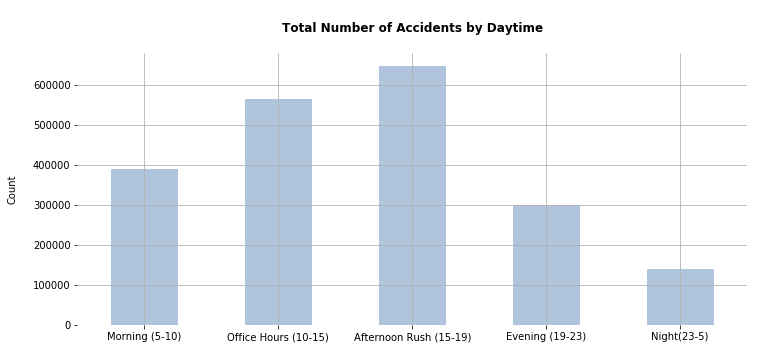

In [10]:
# define labels by accessing look up dictionary above
labels = tuple(daytime_groups.values())

# plot total no. of accidents by daytime
accidents.groupby('Daytime').size().plot(kind='bar', color='lightsteelblue', figsize=(12,5), grid=True)
plt.xticks(np.arange(5), labels, rotation='horizontal')
plt.xlabel(''), plt.ylabel('Count\n')
plt.title('\nTotal Number of Accidents by Daytime\n', fontweight='bold')
sns.despine(top=True, right=True, left=True, bottom=True);

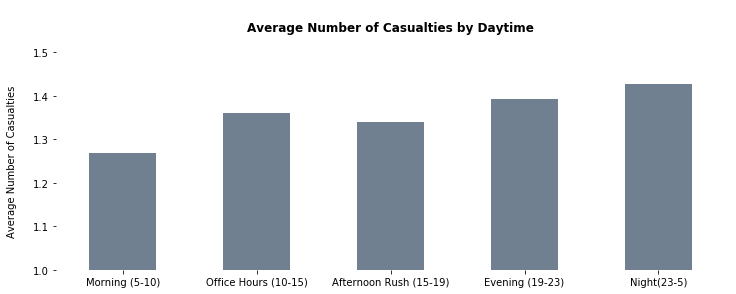

In [11]:
# plot average no. of casualties by daytime
accidents.groupby('Daytime')['Number_of_Casualties'].mean().plot(kind='bar', color='slategrey', 
                                                                 figsize=(12,4), grid=False)
plt.xticks(np.arange(5), labels, rotation='horizontal')
plt.ylim((1,1.5))
plt.xlabel(''), plt.ylabel('Average Number of Casualties\n')
plt.title('\nAverage Number of Casualties by Daytime\n', fontweight='bold')
sns.despine(top=True, right=True, left=True, bottom=True);

In [12]:
print('Proportion of Missing Values in Accidents Table:', 
      round(accidents.isna().sum().sum()/len(accidents),3), '%')

Proportion of Missing Values in Accidents Table: 0.495 %


In [13]:
# drop columns we don't need
accidents = accidents.drop(columns=['Location_Easting_OSGR', 'Location_Northing_OSGR', 
                                    'Longitude', 'Latitude'])

# drop remaining records with NaN's
accidents = accidents.dropna()

# check if we have no NaN's anymore
accidents.isna().sum().sum()

0

In [14]:
# slice columns we want to use
df = accidents[['Accident_Index', 'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week', 
                'Daytime', 'Road_Type', 'Speed_limit', 'Urban_or_Rural_Area', 'LSOA_of_Accident_Location']]
df.isna().sum().sum()

0

In [15]:
# cast categorical features - currently stored as string data - to their proper data format
for col in ['Accident_Severity', 'Day_of_Week', 'Daytime', 'Road_Type', 'Speed_limit', 
            'Urban_or_Rural_Area', 'LSOA_of_Accident_Location']:
    df[col] = df[col].astype('category')
    
#df.info()

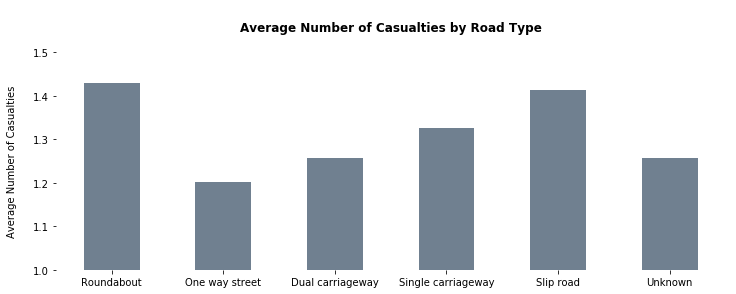

In [16]:
# check road type
df.groupby('Road_Type')['Number_of_Casualties'].mean().plot(kind='bar', color='slategrey', 
                                                            figsize=(12,4), grid=False)
plt.xticks(np.arange(6), 
           ['Roundabout', 'One way street', 'Dual carriageway', 'Single carriageway', 'Slip road', 'Unknown'], 
           rotation='horizontal')
plt.ylim((1,1.5))
plt.xlabel(''), plt.ylabel('Average Number of Casualties\n')
plt.title('\nAverage Number of Casualties by Road Type\n', fontweight='bold')
sns.despine(top=True, right=True, left=True, bottom=True);

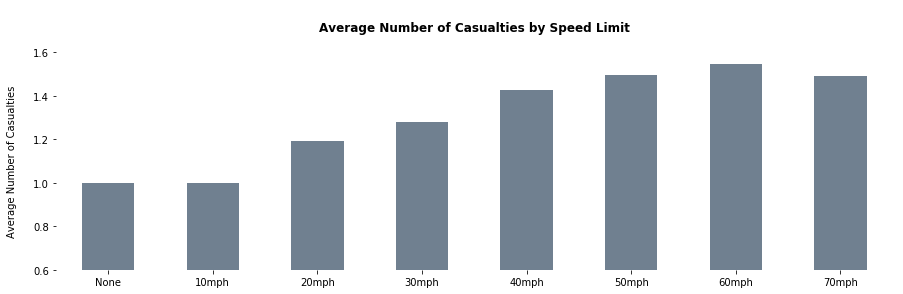

In [17]:
# check speed limit
df.groupby('Speed_limit')['Number_of_Casualties'].mean().plot(kind='bar', color='slategrey', 
                                                              figsize=(15,4), grid=False)
plt.xticks(np.arange(8), 
           ['None', '10mph', '20mph', '30mph', '40mph', '50mph', '60mph', '70mph'], 
           rotation='horizontal')
plt.ylim((0.6,1.6))
plt.xlabel(''), plt.ylabel('Average Number of Casualties\n')
plt.title('\nAverage Number of Casualties by Speed Limit\n', fontweight='bold')
sns.despine(top=True, right=True, left=True, bottom=True);

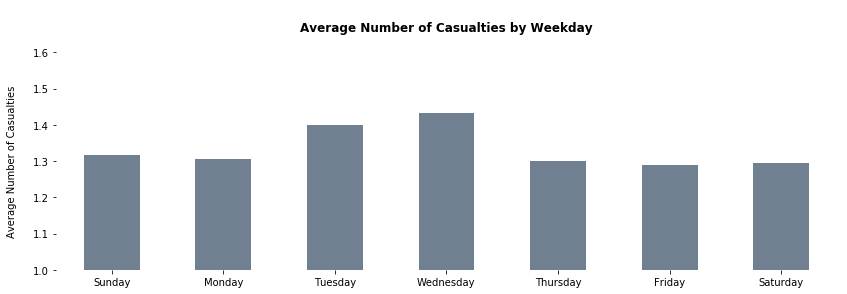

In [18]:
# check daytime
df.groupby('Day_of_Week')['Number_of_Casualties'].mean().plot(kind='bar', color='slategrey', 
                                                              figsize=(14,4), grid=False)
plt.xticks(np.arange(7), 
           ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], 
           rotation='horizontal')
plt.ylim((1.0,1.6))
plt.xlabel(''), plt.ylabel('Average Number of Casualties\n')
plt.title('\nAverage Number of Casualties by Weekday\n', fontweight='bold')
sns.despine(top=True, right=True, left=True, bottom=True);

In [19]:
# define numerical columns
num_cols = ['Number_of_Vehicles', 'Number_of_Casualties']

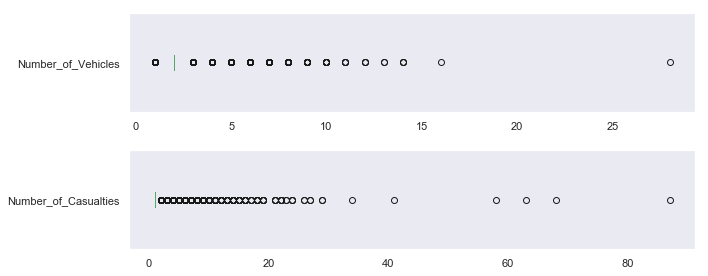

In [20]:
# plotting boxplots
sns.set(style='darkgrid')
fig, axes = plt.subplots(2,1, figsize=(10,4))

for ax, col in zip(axes, num_cols):
    df.boxplot(column=col, grid=False, vert=False, ax=ax)
    plt.tight_layout();

In [21]:
# phrasing conditionto cut off extreme outliers
condition = (df['Number_of_Vehicles'] < 6) & (df['Number_of_Casualties'] < 9)

# keep only records that meet our condition
df = df[condition]

# check
print(df['Number_of_Vehicles'].value_counts())

2    784734
1    250753
3     77860
4     12980
5      2374
Name: Number_of_Vehicles, dtype: int64


In [22]:
print(df['Number_of_Casualties'].value_counts())

1    877175
2    177525
3     48566
4     16487
5      5874
6      2103
7       690
8       281
Name: Number_of_Casualties, dtype: int64


In [23]:
df.head(2)

,Accident_Index,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Daytime,Road_Type,Speed_limit,Urban_or_Rural_Area,LSOA_of_Accident_Location
1,200501BS00002,Slight,1,1,Wednesday,3,Dual carriageway,30.0,Urban,E01002909
6,200501BS00007,Slight,2,1,Thursday,4,Single carriageway,30.0,Urban,E01002875


In [24]:
look_up = pd.read_csv('Output_Area_to_Lower_Layer_Super_Output_Area_to_Middle_Layer_Super_Output_Area_to_Local_Authority_District_December_2017_Lookup_in_Great_Britain__Classification_Version_2.csv')
look_up.head(2)

,OA11CD,OAC11CD,OAC11NM,LSOA11CD,LSOA11NM,SOAC11CD,SOAC11NM,MSOA11CD,MSOA11NM,LAD17CD,LAD17NM,LACCD,LACNM,RGN11CD,RGN11NM,CTRY11CD,CTRY11NM,FID
0,E00070834,1a2,Established Farming Communities,E01014030,Herefordshire 009D,2b,Prospering countryside life,E02002913,Herefordshire 009,E06000019,"Herefordshire, County of",3a2r,Sparse English and Welsh Countryside,E12000005,West Midlands,E92000001,England,11001
1,E00070835,1a2,Established Farming Communities,E01014028,Herefordshire 009B,2a,Ageing rural neighbourhoods,E02002913,Herefordshire 009,E06000019,"Herefordshire, County of",3a2r,Sparse English and Welsh Countryside,E12000005,West Midlands,E92000001,England,11002


In [25]:
df_merged = pd.merge(df, look_up[['LSOA11CD', 'LAD17NM']], how='left', 
                     left_on='LSOA_of_Accident_Location', right_on='LSOA11CD')
df_merged.head(2)

,Accident_Index,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Daytime,Road_Type,Speed_limit,Urban_or_Rural_Area,LSOA_of_Accident_Location,LSOA11CD,LAD17NM
0,200501BS00002,Slight,1,1,Wednesday,3,Dual carriageway,30.0,Urban,E01002909,E01002909,Kensington and Chelsea
1,200501BS00002,Slight,1,1,Wednesday,3,Dual carriageway,30.0,Urban,E01002909,E01002909,Kensington and Chelsea


In [26]:
# drop the key columns, rename the inconveniently named column, ...
# ... cast it to a categorical datetype, and drop duplicates
df_merged = df_merged.drop(columns=['LSOA_of_Accident_Location', 'LSOA11CD'])\
                        .rename(columns={'LAD17NM': 'County_of_Accident'})\
                            .astype({'County_of_Accident': 'category'})\
                                .drop_duplicates()

df_merged.head(2)

,Accident_Index,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Daytime,Road_Type,Speed_limit,Urban_or_Rural_Area,County_of_Accident
0,200501BS00002,Slight,1,1,Wednesday,3,Dual carriageway,30.0,Urban,Kensington and Chelsea
6,200501BS00007,Slight,2,1,Thursday,4,Single carriageway,30.0,Urban,Kensington and Chelsea


In [27]:
df_merged.shape

(1128701, 10)

In [28]:
df_plot = df_merged.groupby('County_of_Accident').size().reset_index().rename(columns={0:'Count'})
df_plot.head()

,County_of_Accident,Count
0,Adur,1238
1,Allerdale,1476
2,Amber Valley,1858
3,Arun,2567
4,Ashfield,2663


In [29]:
# define numerical feature column
num_col = ['Number_of_Vehicles']

# define categorical feature columns
cat_cols = ['Accident_Severity', 'Day_of_Week', 'Daytime', 'Road_Type', 'Speed_limit', 
            'Urban_or_Rural_Area', 'County_of_Accident']

# define target column
target_col = ['Number_of_Casualties']

cols = cat_cols + num_cols + target_col

# copy dataframe
df_model = df_merged[cols].copy()
df_model.shape

(1128701, 10)

In [30]:
# create dummy variables from the categorical features
dummies = pd.get_dummies(df_model[cat_cols], drop_first=True)
df_model = pd.concat([df_model[num_cols], df_model[target_col], dummies], axis=1)
df_model.shape

(1128701, 377)

In [31]:
df_model.isna().sum().sum()

0

In [32]:
# define our features 
features = df_model.drop(['Number_of_Casualties'], axis=1)

# define our target
target = df_model[['Number_of_Casualties']]

In [33]:
from sklearn.model_selection import train_test_split

# split our data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [34]:
# import regressor
from sklearn.ensemble import RandomForestRegressor

# import metrics
from sklearn.metrics import mean_squared_error, r2_score

# import evaluation tools
from sklearn.model_selection import RandomizedSearchCV

In [35]:
# create RandomForestRegressor
forest = RandomForestRegressor(random_state=4, n_jobs=-1)

# train
forest.fit(X_train, y_train)

# predict
y_train_preds = forest.predict(X_train)
y_test_preds  = forest.predict(X_test)

# evaluate
RMSE = np.sqrt(mean_squared_error(y_test, y_test_preds))
print(f"RMSE: {round(RMSE, 4)}")

r2 = r2_score(y_test, y_test_preds)
print(f"r2: {round(r2, 4)}")

RMSE: 0.7579
r2: -0.1011


In [36]:
# look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(forest.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 4,
 'verbose': 0,
 'warm_start': False}


In [37]:
# create range of candidate numbers of trees in random forest
n_estimators = [100, 150]

# create range of candidate max. numbers of levels in tree
max_depth = [3, 4, 5]

# create range of candidate min. numbers of samples required to split a node
min_samples_split = [10, 15, 20]

# create dictionary with hyperparameter options
hyperparameters = dict(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split)
hyperparameters

{'n_estimators': [100, 150],
 'max_depth': [3, 4, 5],
 'min_samples_split': [10, 15, 20]}

In [38]:
forest = RandomForestRegressor(n_estimators=150, max_depth=5, random_state=4, n_jobs=-1)

# train
forest.fit(X_train, y_train)

# predict
y_train_preds = forest.predict(X_train)
y_test_preds  = forest.predict(X_test)

# evaluate
RMSE = np.sqrt(mean_squared_error(y_test, y_test_preds))
print(f"RMSE: {round(RMSE, 4)}")

r2 = r2_score(y_test, y_test_preds)
print(f"r2: {round(r2, 4)}")

RMSE: 0.698
r2: 0.0661


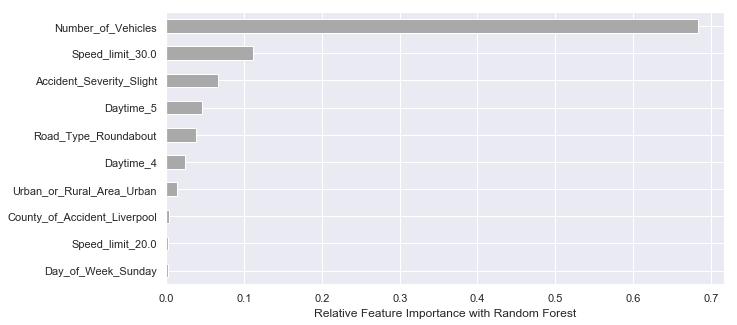

In [39]:
# plot the important features
feat_importances = pd.Series(forest.feature_importances_, index=features.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh', color='darkgrey', figsize=(10,5))
plt.xlabel('Relative Feature Importance with Random Forest');